In [18]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

UsageError: Line magic function `%` not found.


In [30]:
# load dataset
data = pd.read_csv("../data/Dummy-Data.csv")

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(100, 6)


,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate
0,56372,31,Male,510,185,NaN
1,34565,35,Male,510,205,NaN
2,57732,45,Female,510,125,NaN
3,87324,38,Male,503,175,NaN
4,12323,39,Female,600,252,NaN


### Missing values

Let's go ahead and find out which variables of the dataset contain missing values

In [31]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().sum(), 3),  '% missing values')

IssueDate 100 % missing values


##### 

As the IssueDate feature contains 100% missing values we can drop this column

In [32]:
data.drop(["IssueDate"], axis=1, inplace=True)

## BMI Calculation

In [33]:
def calc_bmi(row: pd.DataFrame):
    height_str = str(row["Ht"])
    height = float((int(height_str[0])*30.48 + int(height_str[1:3])*2.54)/100)
    weight = float(row["Wt"]*0.453)
    return round(weight/(height*height),1)

In [34]:
data["bmi"] = data.apply(calc_bmi, axis=1)
data.head()

,AppID,Ins_Age,Ins_Gender,Ht,Wt,bmi
0,56372,31,Male,510,185,26.5
1,34565,35,Male,510,205,29.4
2,57732,45,Female,510,125,17.9
3,87324,38,Male,503,175,31.0
4,12323,39,Female,600,252,34.1


### Quote Calculation

In [35]:
def calc_quote(row: pd.DataFrame, discount: int):
    if 18<row["Ins_Age"]<39 and (row["bmi"]<17.49 or row["bmi"]>38.5):
        return 750 if row["Ins_Gender"]=="Male" else 750 - (750*discount/100)
    elif 40<row["Ins_Age"]<59 and (row["bmi"]<18.49 or row["bmi"]>38.5):
        return 1000 if row["Ins_Gender"]=="Male" else 1000 - (1000*discount/100)
    elif row["Ins_Age"]>60 and (row["bmi"]<18.49 or row["bmi"]>45.5):
        return 2000 if row["Ins_Gender"]=="Male" else 2000 - (2000*discount/100)
    else:
        return 500 if row["Ins_Gender"]=="Male" else 500 - (500*discount/100)


In [36]:
def find_reason(row: pd.DataFrame):
    if 18<row["Ins_Age"]<39 and (row["bmi"]<17.49 or row["bmi"]>38.5):
        return "Age is between 18 to 39 and BMI is either less than 17.49 or greater than 38.5"
    elif 40<row["Ins_Age"]<59 and (row["bmi"]<18.49 or row["bmi"]>38.5):
        return "Age is between 40 to 59 and 'BMI' is either less than 18.49 or greater then 38.5"
    elif row["Ins_Age"]>60 and (row["bmi"]<18.49 or row["bmi"]>45.5):
        return "Age is greater than 60 and 'BMI' is either less than 18.49 or greater than 38.5"
    else:
        return "BMI is in right range"

In [37]:
discount=10

data["quote"] = data.apply(calc_quote, args=(discount,), axis=1)
data["reason"] = data.apply(find_reason, axis=1)

data.head()

,AppID,Ins_Age,Ins_Gender,Ht,Wt,bmi,quote,reason
0,56372,31,Male,510,185,26.5,500.0,BMI is in right range
1,34565,35,Male,510,205,29.4,500.0,BMI is in right range
2,57732,45,Female,510,125,17.9,900.0,Age is between 40 to 59 and 'BMI' is either le...
3,87324,38,Male,503,175,31.0,500.0,BMI is in right range
4,12323,39,Female,600,252,34.1,450.0,BMI is in right range


### Analysis

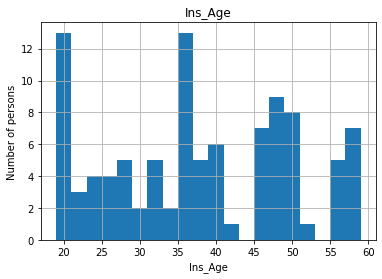

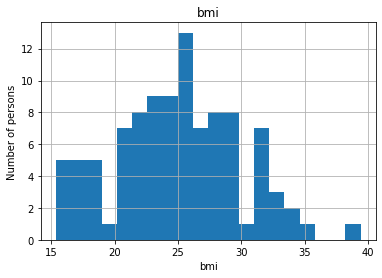

In [38]:
# Let's go ahead and analyse the distributions of continous variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of persons')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in ["Ins_Age","bmi"]:
    analyse_continous(data, var)

<Figure size 1080x360 with 0 Axes>

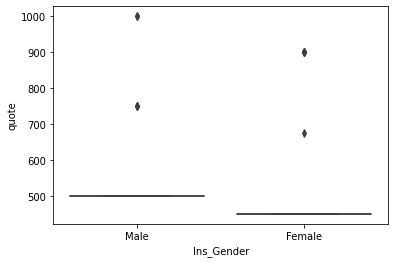

In [42]:
# Let's analyse the distributions of categorical variables

def plot_categ_var(df,var):
    plt.figure(figsize=(15,5))
    plt.figure()
    sns.boxplot(x=var,y='quote',data=df)
    plt.show()
    
for var in ["Ins_Gender"]:
    plot_categ_var(data,var)

### Conclusion

As we already have predefined business rules to calculate the quote we need not train any machine learning model to predict the quote. We can just implement these rules as a function and use it to find the quote.